In [1]:
import pandas as pd
# top-selling software products in different regions.
# Load data
df = pd.read_csv(r"C:\Users\hamad\Downloads\best_sellers_data2.csv")

# Top 5 products by country
top_products_by_country = df.sort_values('rank').groupby('country').head(5)

print(top_products_by_country[['country', 'product_title', 'rank']])


     country                                      product_title  rank
0         US  TurboTax Deluxe 2024 Tax Software, Federal & S...     1
2023      IN                                    App Store Codes     1
1923      DE  WISO Steuer 2025 (für Steuerjahr 2024) Für Win...     1
1823      FR  Microsoft 365 Famille - Office 365 apps - jusq...     1
1723      CA  TurboTax Standard 2024 - 8 Returns - English -...     1
...      ...                                                ...   ...
1004      ES  Microsoft 365 Personal | 1 persona |PC/MAC/tab...     5
904       SG  Bitdefender Total Security 2021 - 5 Devices | ...     5
1329      SE  F-Secure TOTAL | 1 år | 5 enheter | Attach | K...     5
1204      JP  【Adobe公式】Acrobat Pro 純正PDF編集ソフト（最新）| 12ヵ月 | オン...     5
1304      PL  Nero VHS to USB Video Grabber Recode Stick wra...     5

[80 rows x 3 columns]


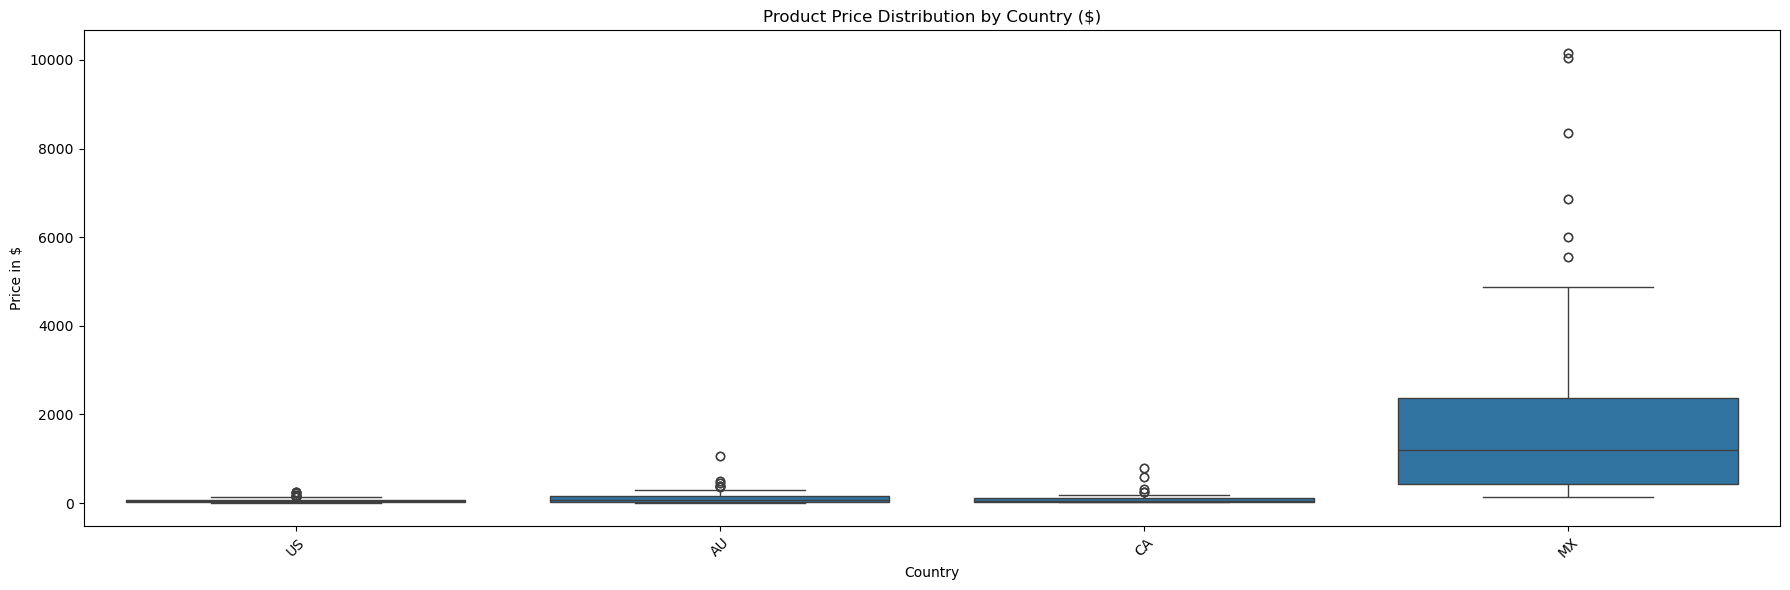

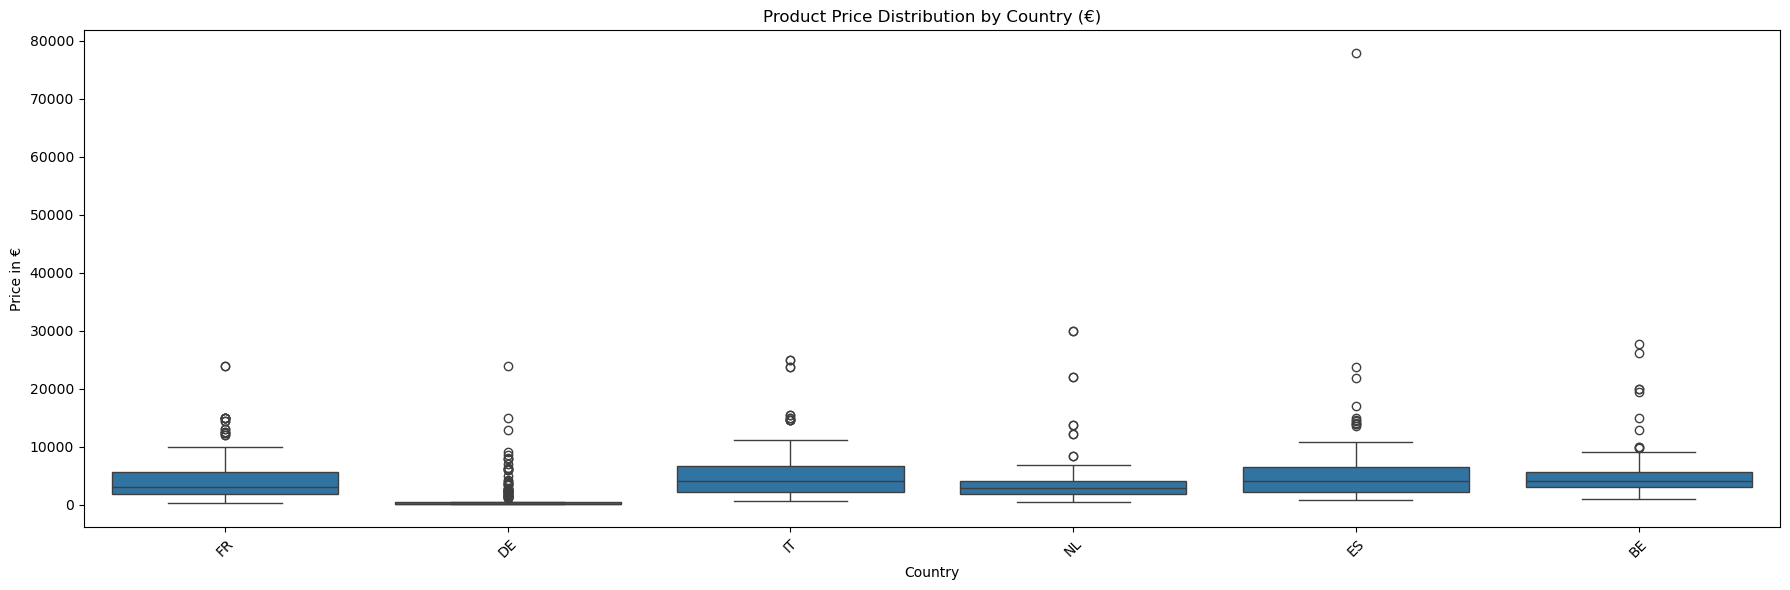

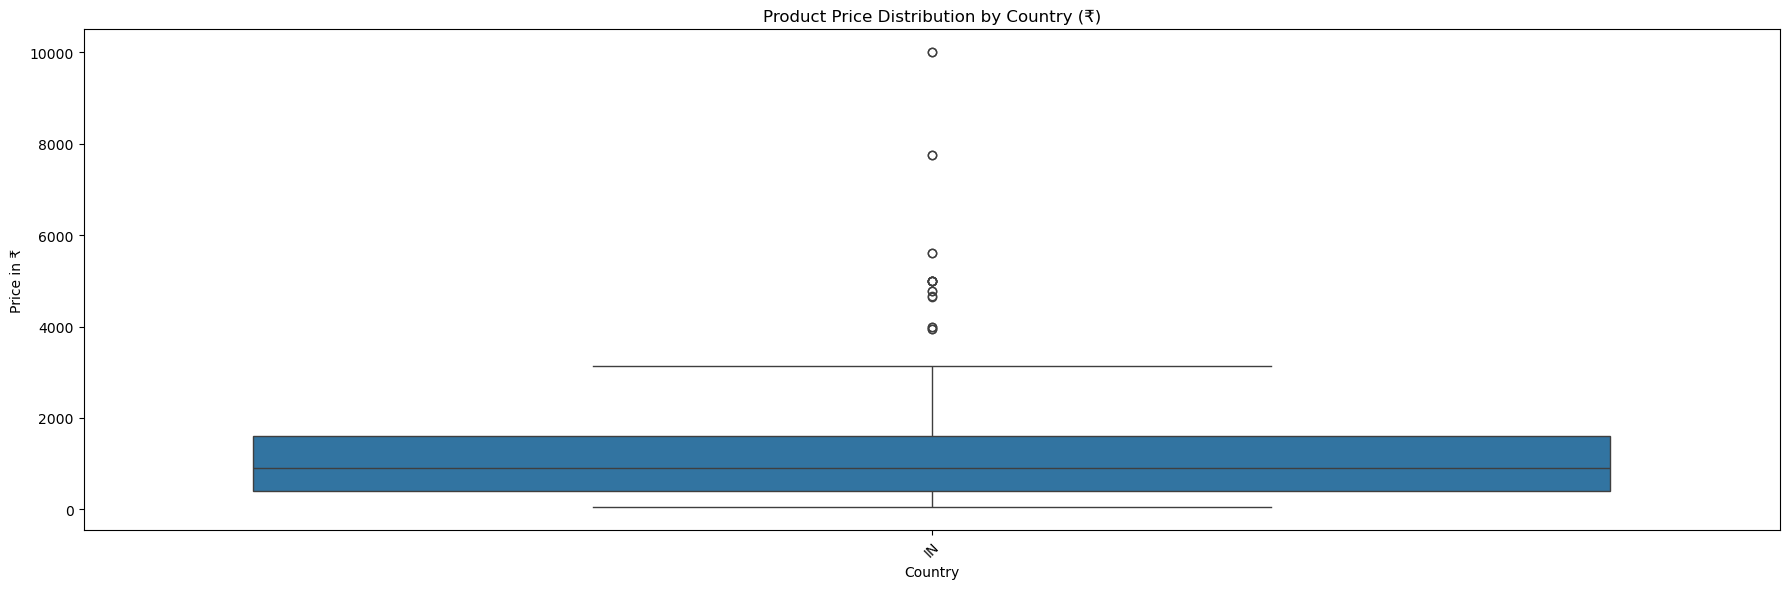

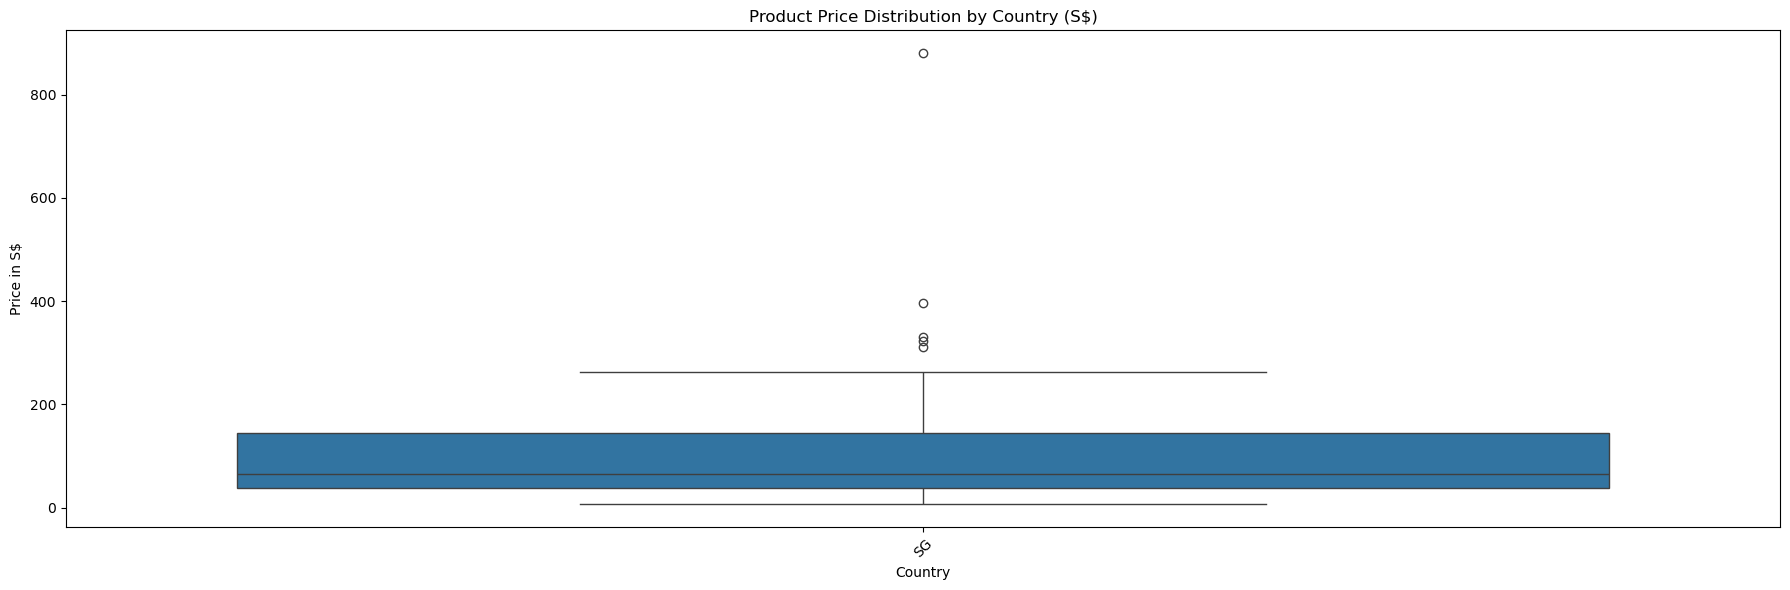

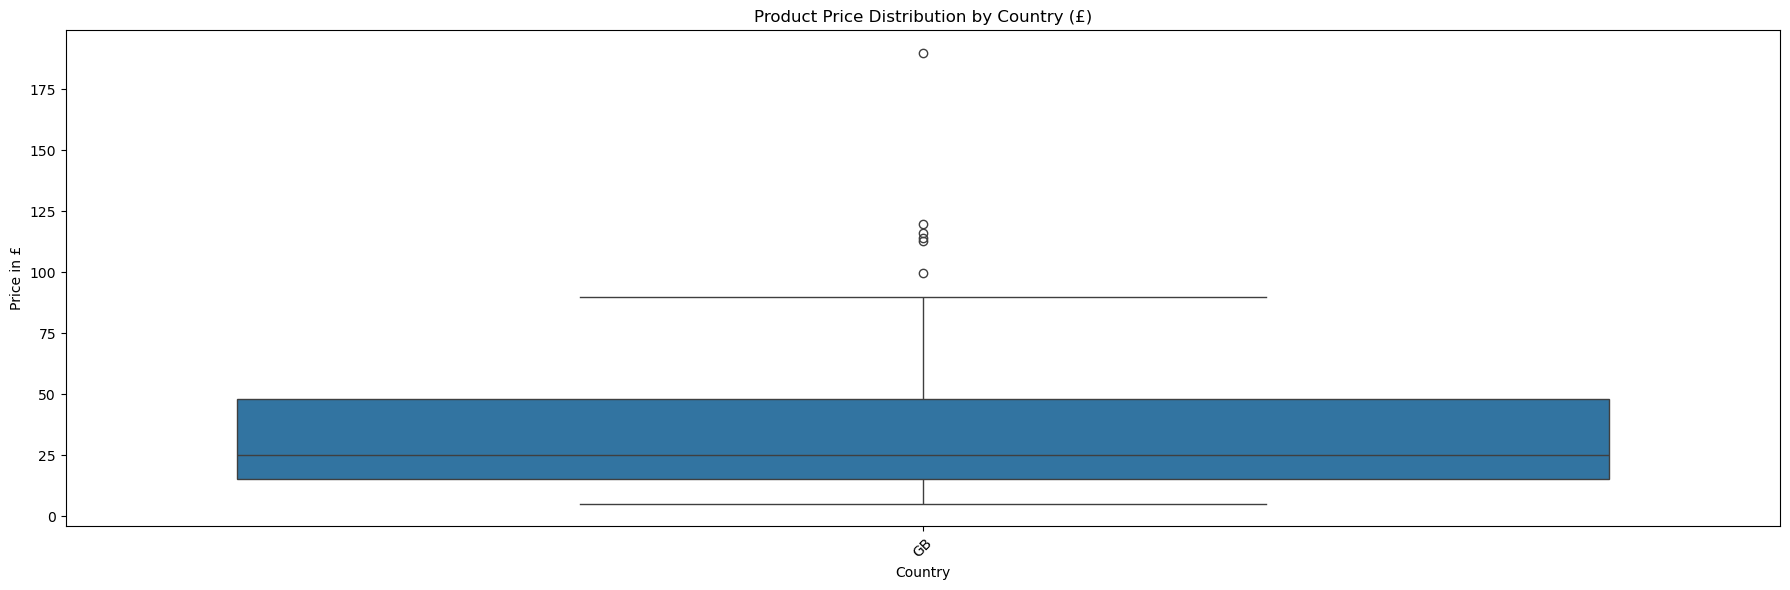

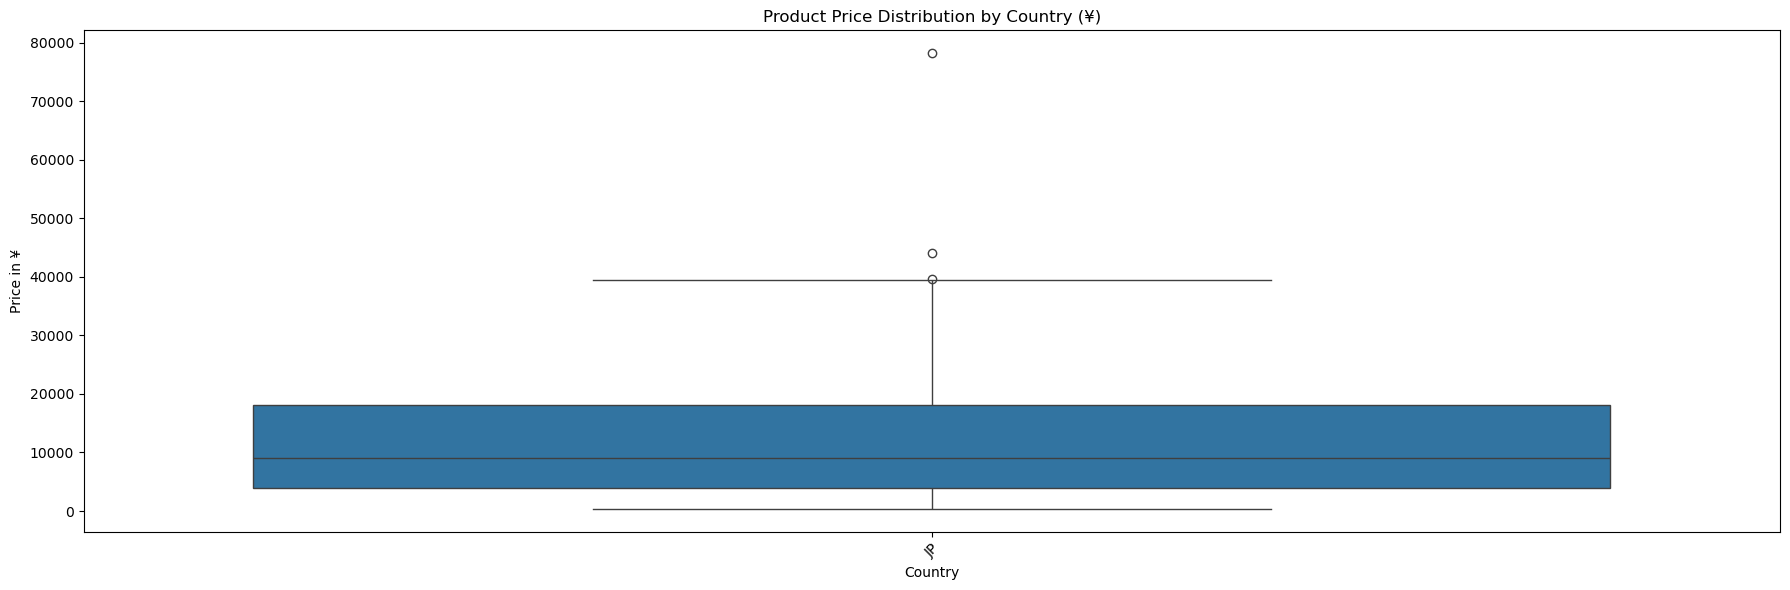

C:\Users\hamad\AppData\Local\Temp\ipykernel_10808\2535982979.py:28: UserWarning: Glyph 65509 (\N{FULLWIDTH YEN SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hamad\Downloads\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65509 (\N{FULLWIDTH YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


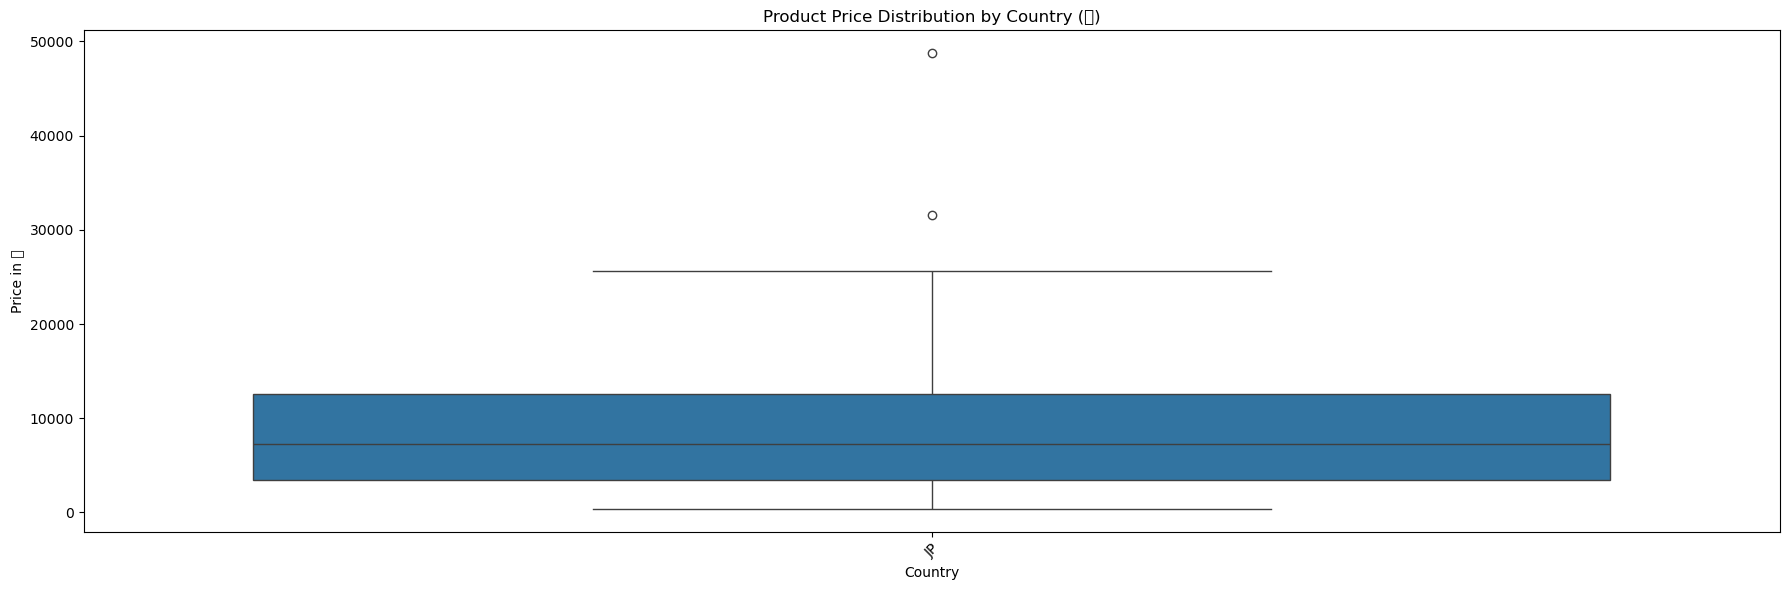

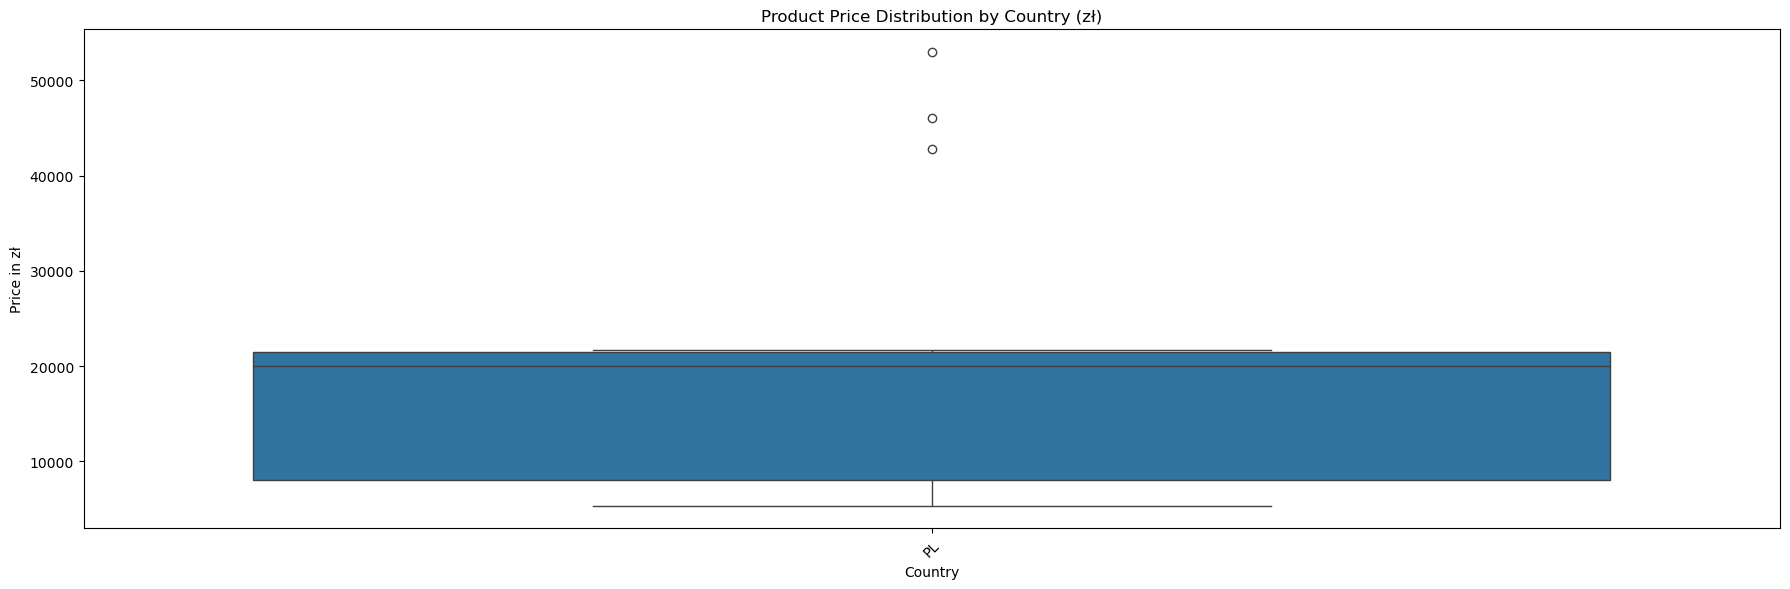

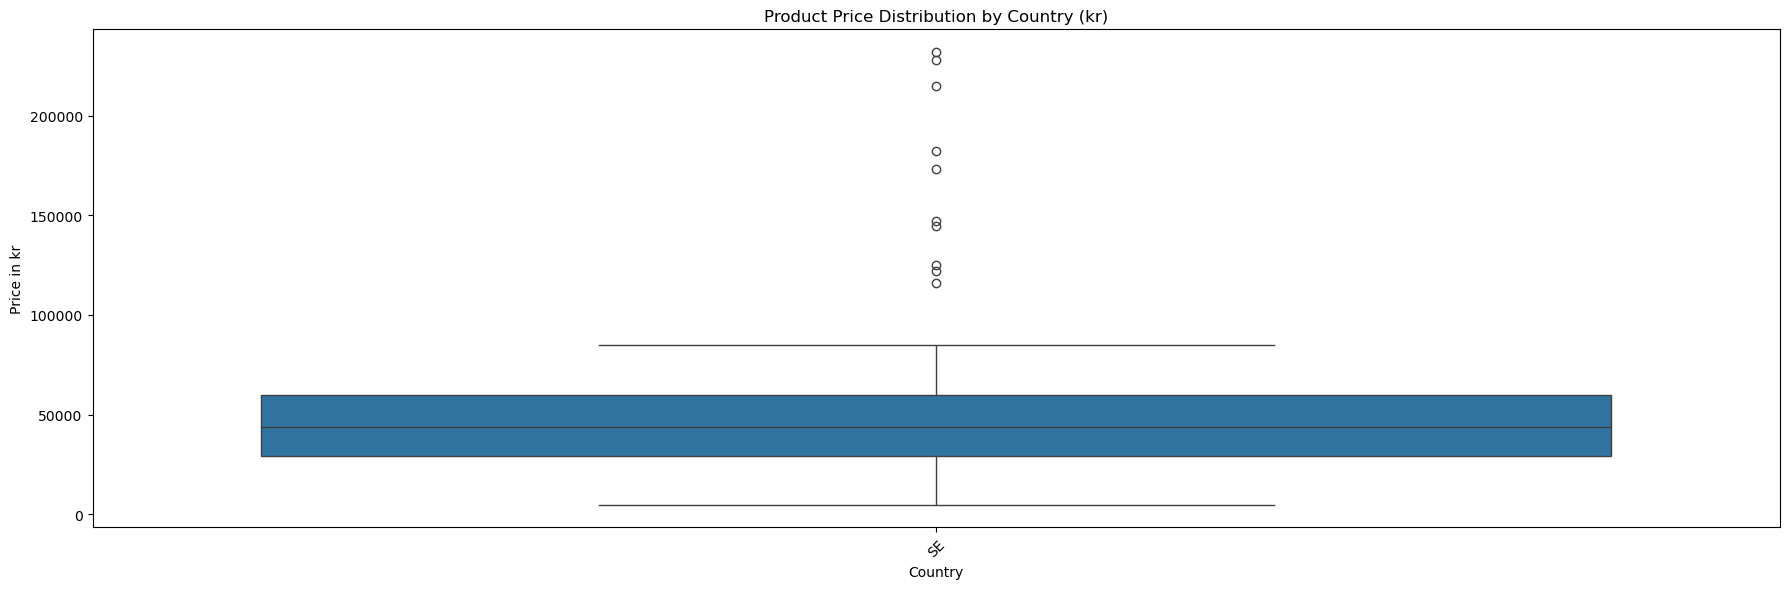

In [21]:

# Pricing Strategy Optimization – Comparing prices across markets and tracking fluctuations
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Extract currency symbols (₹, £, $, €, etc.)
df['currency'] = df['product_price'].str.extract(r'([^\d.,\s]+)')

# Step 2: Remove all non-numeric characters from price and convert to float
df['product_price_clean'] = df['product_price'].replace(r'[^\d.]', '', regex=True)

# Step 3: Handle cases where conversion might still fail
df['product_price_clean'] = pd.to_numeric(df['product_price_clean'], errors='coerce')

# Drop rows where conversion failed (NaN values)
df = df.dropna(subset=['product_price_clean'])

# Step 4: Generate boxplots per currency
currencies = df['currency'].dropna().unique()

for curr in currencies:
    subset = df[df['currency'] == curr]

    plt.figure(figsize=(18, 6))
    sns.boxplot(data=subset, x='country', y='product_price_clean')
    plt.title(f'Product Price Distribution by Country ({curr})')
    plt.xlabel('Country')
    plt.ylabel(f'Price in {curr}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



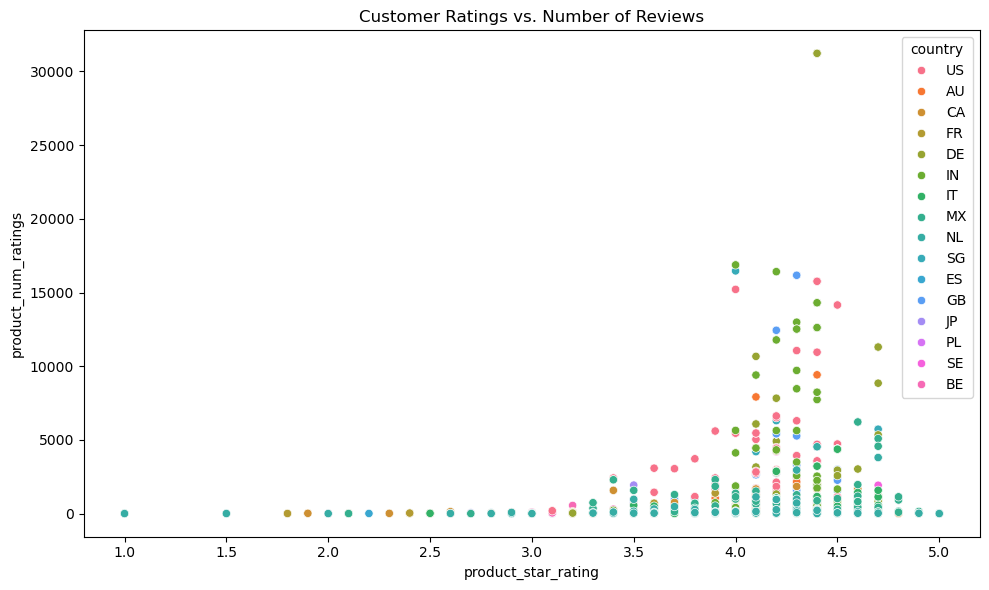

In [6]:
#Analyzing customer ratings and review trends.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ratings vs Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='product_star_rating', y='product_num_ratings', hue='country')
plt.title('Customer Ratings vs. Number of Reviews')
plt.tight_layout()
plt.show()


In [10]:
# Understanding how products rank in different countries.
# Group by product and country, show average rank
avg_rank = df.groupby(['product_title', 'country'])['rank'].mean().reset_index()
top_ranked = avg_rank.sort_values('rank').head(10)

print(top_ranked)


                                          product_title country  rank
1373  TurboTax Standard 2024 - 8 Returns - English -...      CA   1.0
788   Microsoft 365 Personal | Suscripción de 12 mes...      ES   1.0
789   Microsoft 365 Personal |Abbonamento di 12 mesi...      IT   1.0
1009  Norton 360 Deluxe 2020, Antivirus software for...      NL   1.0
691   McAfee Total Protection 3-Device 2025 |15-Mont...      GB   1.0
750   Microsoft 365 Family - 1 Year Subscription [Di...      AU   1.0
1401  WISO Steuer 2025 (für Steuerjahr 2024) Für Win...      DE   1.0
1020  Norton 360 Deluxe 2023, Antivirusprogram för 5...      SE   1.0
1138  NortonLifeLock 360 Deluxe 2022 |5 Appareils | ...      BE   1.0
672   McAfee Total Protection 2024 | 3 urządzenia | ...      PL   1.0
